# Simulação de canais quânticos para estado inicial misto

Vamos considerar que o sistema $A$ inicia no estado misto
$$\rho_A = \sum_{l,m=0}^{d-1}\rho_{l,m}^{A}|l\rangle_{A}\langle m|.$$
O mapa
$$V_{AB}|\psi\rangle_A \otimes|0\rangle_B = \sum_j K_j|\psi\rangle_A \otimes|j\rangle_B$$
vale para qualquer estado $|\psi\rangle$, inclusive aqueles da base computacional, i.e.,
$$V_{AB}\big(|l\rangle_{A}\otimes|0\rangle_{B}\big) = \sum_{j}\big(K_{j}|l\rangle_{A}\big)\otimes|j\rangle_{B}.$$
Com isso, podemos escrever o estado global evoluído como segue
\begin{align}
\tilde{\rho}_{AB} & = V_{AB}\big(\rho_{A}\otimes|0\rangle_{B}\langle 0|\big)V_{AB}^{\dagger} \\
& = V_{AB}\Big(\sum_{l,m=0}^{d-1}\rho_{l,m}^{A}|l\rangle_{A}\langle m|\otimes|0\rangle_{B}\langle 0|\Big)V_{AB}^{\dagger} \\
& = \sum_{l,m=0}^{d-1}\rho_{l,m}^{A}V_{AB}\big(|l\rangle_{A}\otimes|0\rangle_{B}\big)\big(\langle m|_{A}\otimes\langle 0|_{B}\big)V_{AB}^{\dagger} \\
& = \sum_{l,m=0}^{d-1}\rho_{l,m}^{A}\Big(\sum_{j}\big(K_{j}|l\rangle_{A}\big)\otimes|j\rangle_{B}\Big)\Big(\sum_{k}\big(\langle m|_{A}K_{k}^{\dagger}\big)\otimes\langle k|_{B}\Big) \\
& = \sum_{j,k}K_{j}\Big(\sum_{l,m=0}^{d-1}\rho_{l,m}^{A}|l\rangle_{A}\langle m|_{A}\Big)K_{k}^{\dagger}\otimes|j\rangle_{B}\langle k| \\
& = \sum_{j,k}K_{j}\rho_{A}K_{k}^{\dagger}\otimes|j\rangle_{B}\langle k|.
\end{align}

Assim
$$Tr_{B}(\tilde{\rho}_{AB}) = \sum_{j}K_{j}\rho_{A}K_{j}^{\dagger}=\Lambda(\rho_A).$$

No entanto, isso não resolve a questão de como implementar esse mapa para estados iniciais mistos, uma vez que teríamos que preparar $\tilde{\rho}_{AB}$. Vejamos três formas de fazer isso. 

## 1ª forma
Conhecendo $\rho_{A}$ e $\{K_{j}\}$ podemos usar pré-processamento clássico para calcular 
$$\tilde{\rho}_{AB} = \sum_{l,m=0}^{d-1}\rho_{l,m}^{A}\Big(\sum_{j}\big(K_{j}|l\rangle_{A}\big)\otimes|j\rangle_{B}\Big)\Big(\sum_{k}\big(\langle m|_{A}K_{k}^{\dagger}\big)\otimes\langle k|_{B}\Big).$$
Ou seja, teremos que calcular $\sum_{j}\big(K_{j}|l\rangle_{A}\big)\otimes|j\rangle_{B}$ para todos os estados $|l\rangle_{A}$ da base computacional. 
Tendo calculado e __diagonalizado__ essa matriz densidade, 
$$\tilde{\rho}_{AB} = \sum_{j=0}^{d_{AB}-1}\lambda_{j}|\lambda_{j}\rangle_{AB}\langle \lambda_{j}|,$$ podemos obter o estado evoluído sob a operação quântica $\Lambda$ preparando o estado misto $\tilde{\rho}_{AB}$ em um computador quântico através de uma purificação
$$|\Phi\rangle_{ABC} = \sum_{j=0}^{d_{AB}-1}\sqrt{\lambda_{j}}|\lambda_{j}\rangle_{AB}\otimes|j\rangle_{C}.$$
Tomando o traço parcial sobre $B$ e $C$ obtemos o estado esperado:
$$\Lambda(\rho_{A}) = Tr_{BC}\big(|\Phi\rangle_{ABC}\langle\Phi|\big).$$

## 2ª forma
Começamos notando que qualquer estado misto pode ser diagonalizado:
$$\rho_{A} = \sum_{k=0}^{d_{A}-1}r_{k}|r_{k}\rangle_{A}\langle r_{k}|.$$
Os operadores de Kraus são operadores linerares. Com isso vem que
\begin{align}
\Lambda(\rho_{A}) & = \sum_{j}K_{j}\rho_{A}K_{j}^{\dagger} \\
& = \sum_{j}K_{j}\sum_{k=0}^{d_{A}-1}r_{k}|r_{k}\rangle_{A}\langle r_{k}|K_{j}^{\dagger} \\
& = \sum_{k=0}^{d_{A}-1}r_{k}\sum_{j}K_{j}|r_{k}\rangle_{A}\langle r_{k}|K_{j}^{\dagger} \\
& = \sum_{k=0}^{d_{A}-1}r_{k}\Lambda(|r_{k}\rangle).
\end{align}

Assim, podemos simular o canal quântico aplicado a um estado misto primeiramente obtendo a decomposição espectral de $\rho_{A}$, depois preparando
$$|\Psi_{k}\rangle_{AB} = \sum_{j}\big(K_{j}|r_{k}\rangle\big)\otimes|j\rangle_{B}$$
para 
$$k=0,\cdots,d_{A}-1$$
e traçando o sistema $B$ para obter 
$$\Lambda(|r_{k}\rangle) = Tr_{B}\big(|\Psi_{k}\rangle_{AB}\langle\Psi_{k}|\big)$$
e finalmente calculando a mistura estatísitca 
$$\sum_{k}r_{k}\Lambda(|r_{k}\rangle)=\Lambda(\rho_A).$$
Vale observar que este 2º método envolve a diagonalização de matrizes de menor dimensão quando comparado ao 1º método, mas necessita de pós-processamento clássico, enquanto que na 1ª forma usamos pré-processamento clássico.

## 3ª forma
Começamos obtendo a decomposição espectral
$$\rho_A = \sum_j r_j |r_j\rangle\langle r_j|$$
e considerando a seguinte purificação deste operador densidade:
$$|\Psi\rangle_{AB} = \sum_j \sqrt{r_j }|r_j\rangle_A \otimes|j\rangle_B .$$
Na sequência, verificamos que
\begin{align}
& Tr_B \big(\Lambda_A \otimes id_B(|\Psi\rangle_{AB})\big) \\
& = Tr_B \big(\sum_j K_j \otimes\mathbb{I}_B |\Psi\rangle_{AB}\langle\Psi|K_j^\dagger \otimes\mathbb{I}_B\big) \\
& = Tr_B \big(\sum_j K_j \otimes\mathbb{I}_B \sum_l \sqrt{r_l }|r_l\rangle_A \otimes|l\rangle_B \sum_m \sqrt{r_m }\langle r_m |_A \otimes\langle m |_B K_j^\dagger \otimes\mathbb{I}_B\big) \\
& = Tr_B \big(\sum_{j,l,m}\sqrt{r_l r_m} K_j |r_l\rangle_A\langle r_m |K_j^\dagger \otimes|l\rangle_B\langle m | \big) \\
& = \sum_{j,l,m}\sqrt{r_l r_m} K_j |r_l\rangle_A\langle r_m |K_j^\dagger \otimes \delta_{m,l} \\
& = \sum_{j}  K_j \sum_{l}r_l|r_l\rangle_A\langle r_l |K_j^\dagger \\
& = \sum_{j}  K_j \rho_A K_j^\dagger \\
& = \Lambda(\rho_A).
\end{align}

Analogamente a como obtemos a purificação para o estado inicial puro,
$$V_{AB}|\psi\rangle_A \otimes|0\rangle_B = \sum_j K_j |\psi\rangle_A \otimes|j\rangle_B,$$
podemos obter a purificação para a operação quântica aplicada em um subsistema de um sistema composto em um estado puro:
$$V_{ABC}|\Psi\rangle_{AB}\otimes|0\rangle_C = \sum_j K_j\otimes\mathbb{I}_B |\Psi\rangle_{AB} \otimes|j\rangle_C =:|\Phi\rangle_{ABC}.$$
Notamos assim que $\dim\mathcal{H}_C$ é igual ao número de operadores de Kraus. A seguir, verificamos a afirmação acima:
\begin{align}
& Tr_C \big(V_{ABC}|\Psi\rangle_{AB}\otimes|0\rangle_C \langle\Psi|_{AB} \otimes\langle 0|_C V_{ABC}^\dagger \big) \\
& = Tr_C \big(\sum_j K_j\otimes\mathbb{I}_B |\Psi\rangle_{AB} \otimes|j\rangle_C \sum_l \langle\Psi|_{AB} K_l^\dagger \otimes\mathbb{I}_B \otimes\langle l|_C  \big) \\
& = Tr_C \big(\sum_{j,l} K_j\otimes\mathbb{I}_B |\Psi\rangle_{AB} \langle\Psi|_{AB} K_l^\dagger \otimes\mathbb{I}_B \otimes|j\rangle_C \langle l|_C  \big) \\
& = \sum_{j,l} K_j\otimes\mathbb{I}_B |\Psi\rangle_{AB} \langle\Psi|_{AB} K_l^\dagger\otimes\mathbb{I}_B \otimes \delta_{l,j} \\
& = \sum_{j} K_j\otimes\mathbb{I}_B |\Psi\rangle_{AB} \langle\Psi|_{AB} K_j^\dagger\otimes\mathbb{I}_B \\
& = \Lambda_A \otimes\mathbb{I}_B(|\Psi\rangle_{AB}).
\end{align}

Com isso, vemos que podemos simular 
$$\Lambda(\rho_A) = Tr_{BC}\big(|\Phi\rangle_{ABC}\langle\Phi|\big)$$
preparando o estado
\begin{align}
|\Phi\rangle_{ABC} & = \sum_j K_j \otimes\mathbb{I}_B |\Psi\rangle_{AB} \otimes |j\rangle_C \\
& = \sum_j K_j \otimes\mathbb{I}_B \sum_l \sqrt{r_l}|r_l\rangle\otimes|l\rangle_B \otimes |j\rangle_C \\
& = \sum_{j,l} \sqrt{r_l}K_j|r_l\rangle\otimes|l\rangle_B \otimes |j\rangle_C,
\end{align}
com o índice $j$ indo de 1 até o número de operadores de Kraus especificando $\Lambda$ e o índice $l$ vai de 1 até o rank de $\rho_A$.

### Exemplo: Canal depolarizing

Para o canal de Pauli, temos os operadores de Kraus
$$K_0 = \sqrt{p_I}\mathbb{I},\ K_1=\sqrt{p_X}X,\ K_2=\sqrt{p_Z}Z,\ K_3=\sqrt{p_Y}Y.$$
Se fazemos 
$$p_I=\frac{1+3(1-p)}{4}=\frac{4-3p}{4},\ p_X=p_Z=p_Y=\frac{p}{4}$$
obtemos o canal depolarizing. Para verificação, primeiro calculamos
\begin{align}
X\rho X & = X\begin{bmatrix} \rho_{00} & \rho_{01} \\ \rho_{10} & \rho_{11} \end{bmatrix}\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} \rho_{01} & \rho_{00} \\ \rho_{11} & \rho_{10} \end{bmatrix} \\
& = \begin{bmatrix} \rho_{11} & \rho_{10} \\ \rho_{01} & \rho_{00} \end{bmatrix}, \\
Z\rho Z & = Z\begin{bmatrix} \rho_{00} & \rho_{01} \\ \rho_{10} & \rho_{11} \end{bmatrix}\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}\begin{bmatrix} \rho_{00} & -\rho_{01} \\ \rho_{10} & -\rho_{11} \end{bmatrix} \\
& = \begin{bmatrix} \rho_{00} & -\rho_{01} \\ -\rho_{10} & \rho_{11} \end{bmatrix}, \\
Y\rho Y & = Y\begin{bmatrix} \rho_{00} & \rho_{01} \\ \rho_{10} & \rho_{11} \end{bmatrix}\begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}\begin{bmatrix} i\rho_{01} & -i\rho_{00} \\ i\rho_{11} & -i\rho_{10} \end{bmatrix} \\
& = \begin{bmatrix} \rho_{11} & -\rho_{10} \\ -\rho_{01} & \rho_{00} \end{bmatrix}.
\end{align}

Com isso, podemos escrever
\begin{align}
\Lambda_d(\rho) & = K_0\rho K_0^\dagger + K_1\rho K_1^\dagger + K_2\rho K_2^\dagger + K_3\rho K_3^\dagger \\
& = \frac{4-3p}{4}\rho + \frac{p}{4}\big(X\rho X + Z\rho Z + Y\rho Y\big) \\
& = \frac{4-3p}{4}\begin{bmatrix} \rho_{00} & \rho_{01} \\ \rho_{10} & \rho_{11} \end{bmatrix} + \frac{p}{4}\Big(\begin{bmatrix} \rho_{11} & \rho_{10} \\ \rho_{01} & \rho_{00} \end{bmatrix} + \begin{bmatrix} \rho_{00} & -\rho_{01} \\ -\rho_{10} & \rho_{11} \end{bmatrix} +  \begin{bmatrix} \rho_{11} & -\rho_{10} \\ -\rho_{01} & \rho_{00} \end{bmatrix}\big) \\
& = (1-p/2)\begin{bmatrix} \rho_{00} & 0 \\ 0 & \rho_{11} \end{bmatrix} + (1-p)\begin{bmatrix} 0 & \rho_{01} \\ \rho_{10} & 0 \end{bmatrix} + (p/2) \begin{bmatrix} \rho_{11} & 0 \\ 0 & \rho_{00} \end{bmatrix} \\
& = (1-p/2)\begin{bmatrix} \rho_{00} & 0 \\ 0 & \rho_{11} \end{bmatrix} + (1-p)\begin{bmatrix} 0 & \rho_{01} \\ \rho_{10} & 0 \end{bmatrix} + (p/2) \begin{bmatrix} 1-\rho_{00} & 0 \\ 0 & 1-\rho_{11} \end{bmatrix} \\
& = (1-p)\begin{bmatrix} \rho_{00} & 0 \\ 0 & \rho_{11} \end{bmatrix} + (1-p)\begin{bmatrix} 0 & \rho_{01} \\ \rho_{10} & 0 \end{bmatrix} + (p/2) \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}\\
& = (1-p)\rho + p\frac{\mathbb{I}}{2} \\
& = \begin{bmatrix} ((1-p)\rho_{00}+p/2) &  (1-p)\rho_{01} \\ (1-p)\rho_{10} & ((1-p)\rho_{11}+p/2) \end{bmatrix},
\end{align}

em que usamos
\begin{align}
& \frac{4-3p}{4} + \frac{p}{4} = \frac{4-2p}{4} = 1 - \frac{p}{2}, \\
& \frac{4-3p}{4} - \frac{p}{4} = \frac{4-4p}{4} = 1 - p.
\end{align}
Assim, teremos que a coerência e preditibilidade evoluídas no tempo são dadas por
\begin{align}
C_{l_1}(\Lambda_d (\rho)) & = 2|\Lambda_d (\rho)_{01}| \\
& = 2|(1-p)\rho_{01}| = (1-p)2|\rho_{01}| \\
& = (1-p)C_{l_1}(\rho), \\
P(\Lambda_d (\rho)) & = |\Lambda_d (\rho)_{00}-\Lambda_d (\rho)_{11}| \\
& = |(1-p)\rho_{00}+p/2-(1-p)\rho_{11}-p/2| \\
& = (1-p)|\rho_{00}-\rho_{11}| \\
& = (1-p)P(\rho).
\end{align}

#### 1ª forma
Para $l=0,1$, vamos definir
\begin{align}
|\Psi_l\rangle_{AB} & := V_{AB}|l\rangle_A \otimes|0\rangle_B \\
& = \sum_{j=0}^3 K_{j}|l\rangle_A \otimes|j\rangle_B \\
& = K_{0}|l\rangle_A \otimes|0\rangle_B + K_{1}|l\rangle_A \otimes|1\rangle_B + K_{2}|l\rangle_A \otimes|2\rangle_B + K_{3}|l\rangle_A \otimes|3\rangle_B \\
& = \sqrt{p_I}\mathbb{I}|l\rangle_A \otimes|0\rangle_B + \sqrt{p_X}X|l\rangle_A \otimes|1\rangle_B + \sqrt{p_Z}Z|l\rangle_A \otimes|2\rangle_B + \sqrt{p_Y}Y|l\rangle_A \otimes|3\rangle_B \\
& = \sqrt{\frac{4-3p}{4}}|l\rangle_A \otimes|0\rangle_B + \sqrt{\frac{p}{4}}\big(|\bar{l}\rangle_A \otimes|1\rangle_B + (-1)^l |l\rangle_A \otimes|2\rangle_B + (-1)^l i|\bar{l}\rangle_A \otimes|3\rangle_B\big).
\end{align}
Assim
\begin{align}
|\Psi_0\rangle_{AB} & = \sqrt{\frac{4-3p}{4}}|00\rangle_{AB} + \sqrt{\frac{p}{4}}\big(|11\rangle_{AB} + |02\rangle_{AB} + i|13\rangle_{AB}\big), \\
 & = \sqrt{\frac{4-3p}{4}}|000\rangle_{Abc} + \sqrt{\frac{p}{4}}\big(|101\rangle_{Abc} + |010\rangle_{Abc} + i|111\rangle_{Abc}\big), \\
|\Psi_1\rangle_{AB} & = \sqrt{\frac{4-3p}{4}}|10\rangle_{AB} + \sqrt{\frac{p}{4}}\big(|01\rangle_{AB} - |12\rangle_{AB} - i|03\rangle_{AB}\big) \\
 & = \sqrt{\frac{4-3p}{4}}|100\rangle_{Abc} + \sqrt{\frac{p}{4}}\big(|001\rangle_{Abc} - |110\rangle_{Abc} - i|011\rangle_{Abc}\big).
\end{align}

Seguindo, teremos que
\begin{align}
\tilde{\rho}_{AB} & = V_{AB}(\rho_A \otimes|0\rangle_B \langle 0|)V_{AB}^{\dagger} \\
& = \sum_{l,m=0}^{1}\rho_{l,m}^A(V_{AB}|l\rangle_A \otimes|0\rangle_B)(\langle m|_A \otimes\langle 0|_B)V_{AB}^{\dagger} \\
& = \sum_{l,m=0}^{1}\rho_{l,m}^A|\Psi_l\rangle_{AB}\langle\Psi_m| \\
& = \rho_{0,0}^A|\Psi_0\rangle_{AB}\langle\Psi_0| + \rho_{0,1}^A|\Psi_0\rangle_{AB}\langle\Psi_1| + \rho_{1,0}^A|\Psi_1\rangle_{AB}\langle\Psi_0| + \rho_{1,1}^A|\Psi_1\rangle_{AB}\langle\Psi_1|.
\end{align}

In [4]:
%run init.ipynb

#### Cálculo simbólico

In [2]:
# tem algum problema com a funcao produto tensorial do sympy (implementar eu mesmo ...)
k000 = Matrix([1,0,0,0,0,0,0,0]); k001 = Matrix([0,1,0,0,0,0,0,0])
k010 = Matrix([0,0,1,0,0,0,0,0]); k011 = Matrix([0,0,0,1,0,0,0,0])
k100 = Matrix([0,0,0,0,1,0,0,0]); k101 = Matrix([0,0,0,0,0,1,0,0])
k110 = Matrix([0,0,0,0,0,0,1,0]); k111 = Matrix([0,0,0,0,0,0,0,1])
#k000,k001,k010,k011,k100,k101,k110,k111, k001*k001.T

In [4]:
p = symbols('p')
#p = 0
Psi0 = sqrt((4-3*p)/4)*k000 + sqrt(p/4)*(k101+k010+k111)
Psi1 = sqrt((4-3*p)/4)*k100 + sqrt(p/4)*(k001-k110-k011)
#Psi0.T, Psi1.T

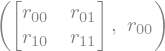

In [6]:
r00,r01,r10,r11 = symbols('r_{00} r_{01} r_{10} r_{11}')
rhoA = Matrix([[r00,r01],[r10,r11]]); rhoA, rhoA[0,0]
#rhoA = Matrix([[2/3,1/3],[1/3,1/3]]); #rhoA, rhoA[0,0]

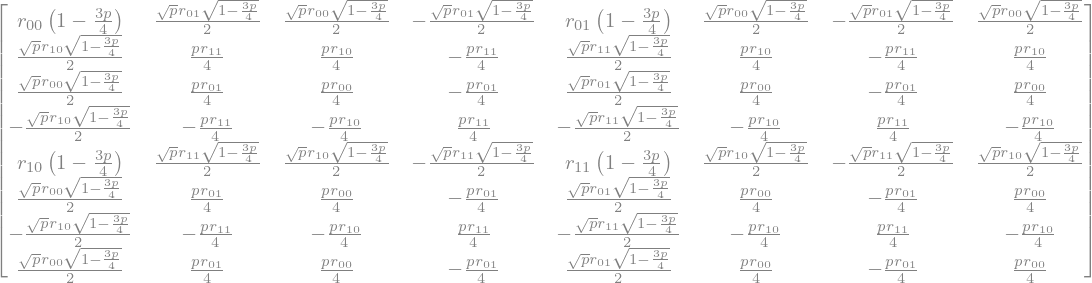

In [14]:
def rhoABt_s(rhoA,p):
    Psi0 = sqrt((4-3*p)/4)*k000 + sqrt(p/4)*(k101+k010+k111)
    Psi1 = sqrt((4-3*p)/4)*k100 + sqrt(p/4)*(k001-k110-k011)
    return rhoA[0,0]*Psi0*Psi0.T + rhoA[0,1]*Psi0*Psi1.T + rhoA[1,0]*Psi1*Psi0.T + rhoA[1,1]*Psi1*Psi1.T
rhoABt_ = rhoABt_s(rhoA,p); rhoABt_
# não foi possivel diagonalizar com sympy

In [18]:
def ptraceB(da, db, rho):
    rhoA = zeros(da,da)
    for j in range(0, da):
        for k in range(0, da):
            for l in range(0, db):
                rhoA[j,k] += rho[j*db+l,k*db+l]
    return rhoA

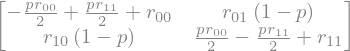

In [16]:
rhoAt = ptraceB(2, 4, rhoABt_); simplify(rhoAt) # ok!

In [20]:
rhoA = Matrix([[2/3,1/3],[1/3,1/3]])
p = np.arange(0,1.1,0.1); N = len(p)
Cl1 = np.zeros(N); Pjb = np.zeros(N)
for j in range(0,N):
    rhoABt_ = rhoABt_s(rhoA,p[j])
    rhoA_ = ptraceB(2, 4, rhoABt_)
    Cl1[j] = coh_l1_s(rhoA_)
    Pjb[j] = predict_jb_s(rhoA_)

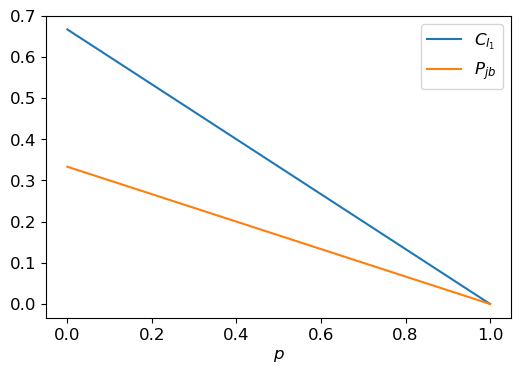

In [26]:
# calculo feito a partir de rhoAB_til
import matplotlib
matplotlib.rcParams.update({'font.size':12})
plt.figure(figsize = (6,4), dpi = 100)
plt.plot(p,Cl1,label=r'$C_{l_1}$')
plt.plot(p,Pjb,label=r'$P_{jb}$')
plt.xlabel(r'$p$')
plt.legend()
plt.show()

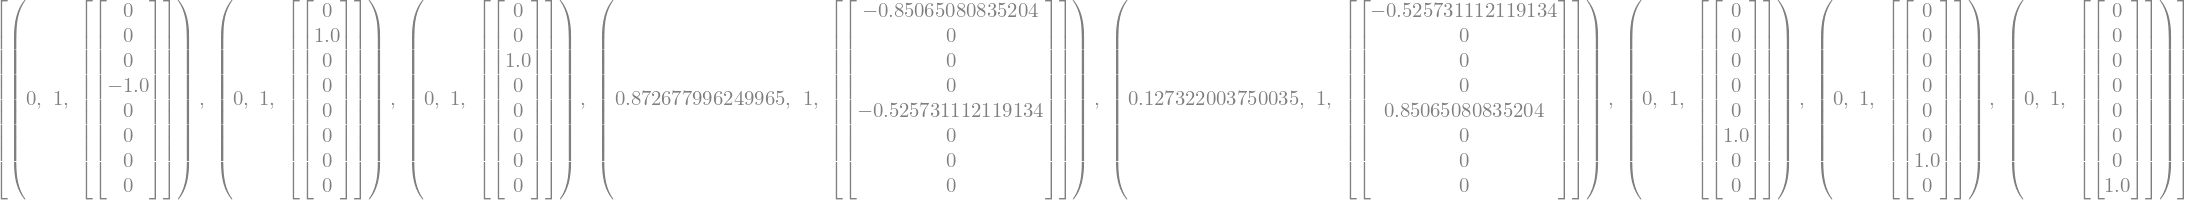

In [93]:
evv = rhoABt.eigenvects(); evv

In [27]:
def tp_vv_s(psi, csi): # tensor product, of vectors, symbolic
    M = psi.shape[0]; N = csi.shape[0]
    eta = zeros(M*N,1)
    for j in range(0,M):
        for k in range(0,N):
            eta[j*N+k] = psi[j]*csi[k]
    return eta

In [28]:
def cb(d,j): # estados da base computacional
    v = zeros(d,1)
    v[j] = 1
    return v
cb(2,0)

In [79]:
def PhiABCt_s(rhoA,p):
    rhoABt = rhoABt_s(rhoA,p)
    eig = rhoABt.eigenvects()
    d = rhoABt.shape[0]; Phi = zeros(d*d,1)
    ne = 0; j = 0; l = -1
    while ne < d:
        mult = eig[j][1]; ne += mult
        for k in range(0,mult):
            l += 1
            Phi += sqrt(abs(eig[j][0]))*tp_vv_s(eig[j][2][k],cb(d,l))
        j += 1
    for j in range(0,d*d):
        if im(Phi[j]) < 10**-5:
            Phi[j] = re(Phi[j])
    return Phi

In [58]:
def coh_l1_s(rho):
    d = rho.shape[0]; C = 0
    for j in range(0,d-1):
        for k in range(j+1,d):
            C += abs(rho[j,k])
    return 2*C

In [5]:
def predict_jb_s(rho):
    return abs(rho[0,0]-rho[1,1])

In [53]:
def proj_s(psi): # simbolic projector
    d = psi.shape[0]
    proj = zeros(d,d)
    for j in range(0,d):
        for k in range(0,d):
            proj[j,k] = psi[j]*conjugate(psi[k])
    return proj

In [82]:
rhoA = Matrix([[2/3,1/3],[1/3,1/3]])
p = np.arange(0,1.1,0.1); N = len(p)
Cl1 = np.zeros(N); Pjb = np.zeros(N)
for j in range(0,N):
    Phi = PhiABCt_s(rhoA,p[j]); PPhi = proj_s(Phi)#; print(PPhi)
    rhoA_ = ptraceB(2, 2**5, PPhi)#; print(rhoA_[0,1])
    Cl1[j] = coh_l1_s(rhoA_)
    Pjb[j] = predict_jb_s(rhoA_)

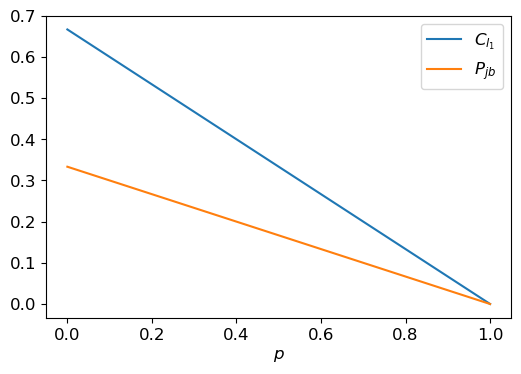

In [83]:
# calculo feito a partir de PhiABC
import matplotlib
matplotlib.rcParams.update({'font.size':12})
plt.figure(figsize = (6,4), dpi = 100)
plt.plot(p,Cl1,label=r'$C_{l_1}$')
plt.plot(p,Pjb,label=r'$P_{jb}$')
plt.xlabel(r'$p$')
plt.legend()
plt.show()

#### Cálculo Numérico

A seguir vamos considerar o estado inicial particular do qubit como sendo
$$\rho_A = \begin{bmatrix}2/3&1/3 \\ 1/3&1/3\end{bmatrix}.$$

In [2]:
def rho_AB_til(rhoA,p):
    rhoAbc = np.zeros((2**3,2**3), dtype=complex)#; print(rhoAbc)
    ket0 = np.array([[1],[0]]); ket1 = np.array([[0],[1]])#; print(ket0,ket1)
    ket00 = np.kron(ket0,ket0); ket01 = np.kron(ket0,ket1); ket10 = np.kron(ket1,ket0)
    ket11 = np.kron(ket1,ket1); #print(ket00,'',ket01,'',ket10,'',ket11)
    ket000 = np.kron(ket0,ket00); ket100 = np.kron(ket1,ket00)
    ket001 = np.kron(ket0,ket01); ket101 = np.kron(ket1,ket01)
    ket010 = np.kron(ket0,ket10); ket110 = np.kron(ket1,ket10)
    ket011 = np.kron(ket0,ket11); ket111 = np.kron(ket1,ket11)
    Psi0 = math.sqrt((4-3*p)/4)*ket000 + math.sqrt(p/4)*(ket101+ket010+ket111)
    Psi1 = math.sqrt((4-3*p)/4)*ket100 + math.sqrt(p/4)*(ket001-ket110-ket011)
    rhoAbc = rhoA[0,0]*Psi0@Psi0.T + rhoA[0,1]*Psi0@Psi1.T\
    + rhoA[1,0]*Psi1@Psi0.T + rhoA[1,1]*Psi1@Psi1.T
    return rhoAbc

In [4]:
def pTraceR_num(dl, dr, rhoLR):
    rhoL = np.zeros((dl, dl), dtype=complex)
    for j in range(0, dl):
        for k in range(j, dl):
            for l in range(0, dr):
                rhoL[j,k] += rhoLR[j*dr+l,k*dr+l]
        if j != k:
            rhoL[k,j] = np.conj(rhoL[j,k])
    return rhoL

In [5]:
rhoA = np.array([[2/3,1/3],[1/3,1/3]]); print(rhoA) # estado inicial
p = 0.
rhoAbc = rho_AB_til(rhoA,p)#; print(rhoAbc)
rhoA_ = pTraceR_num(2, 4, rhoAbc); print(rhoA_)

[[0.66666667 0.33333333]
 [0.33333333 0.33333333]]
[[0.66666667+0.j 0.33333333+0.j]
 [0.33333333-0.j 0.33333333+0.j]]


In [1]:
def coh_l1(rho):
    d = rho.shape[0]; 
    #d = rho.dims()[0]
    C = 0
    for j in range(0,d-1):
        for k in range(j+1,d):
            C += np.abs(rho[j,k])
    return 2*C

In [2]:
def predict_jb(rho):
    return abs(rho[0,0]-rho[1,1])

In [8]:
p = np.arange(0,1.1,0.1); #print(p)
N = len(p)#; print(N)
Cl1 = np.zeros(N); Pjb = np.zeros(N)
for j in range(0,N):
    rhoAbc = rho_AB_til(rhoA,p[j])
    rhoA_ = pTraceR_num(2, 4, rhoAbc)
    Cl1[j] = coh_l1(rhoA_)
    Pjb[j] = predict_jb(rhoA_)

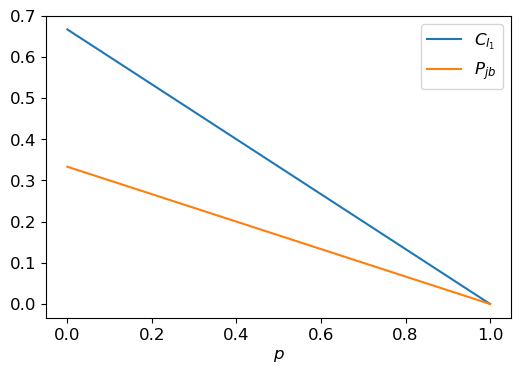

In [9]:
# calculo feito a partir de rhoAB_til
import matplotlib
matplotlib.rcParams.update({'font.size':12})
plt.figure(figsize = (6,4), dpi = 100)
plt.plot(p,Cl1,label=r'$C_{l_1}$')
plt.plot(p,Pjb,label=r'$P_{jb}$')
plt.xlabel(r'$p$')
plt.legend()
plt.show()

In [10]:
from numpy import linalg
w, v = linalg.eig(rhoAbc)
print(v[0][:])
print(np.shape(v[:][0]))

[ 4.25325404e-01  2.62865556e-01  5.26593804e-02 -7.58022640e-01
 -1.03859100e-01  9.53939173e-06 -6.68904776e-06 -1.44129268e-08]
(8,)


In [11]:
ket0 = np.array([[1],[0]]); ket1 = np.array([[0],[1]])
ket00 = np.kron(ket0,ket0); ket01 = np.kron(ket0,ket1)
ket10 = np.kron(ket1,ket0); ket11 = np.kron(ket1,ket1)
ket000 = np.kron(ket0,ket00); ket100 = np.kron(ket1,ket00)
ket001 = np.kron(ket0,ket01); ket101 = np.kron(ket1,ket01)
ket010 = np.kron(ket0,ket10); ket110 = np.kron(ket1,ket10)
ket011 = np.kron(ket0,ket11); ket111 = np.kron(ket1,ket11)

In [12]:
p = np.arange(0,1.1,0.1)
N = len(p)
Cl1 = np.zeros(N); Pjb = np.zeros(N)
for j in range(0,N):
    rhoAbc = rho_AB_til(rhoA,p[j])
    w, v = linalg.eig(rhoAbc); w = np.abs(w)
    PhiAbcdef = math.sqrt(w[0])*np.kron(v.T[0],ket000) + math.sqrt(w[1])*np.kron(v.T[1],ket001)\
                + math.sqrt(w[2])*np.kron(v.T[2],ket010) + math.sqrt(w[3])*np.kron(v.T[3],ket011)\
                + math.sqrt(w[4])*np.kron(v.T[4],ket100) + math.sqrt(w[5])*np.kron(v.T[5],ket101)\
                + math.sqrt(w[6])*np.kron(v.T[6],ket110) + math.sqrt(w[7])*np.kron(v.T[7],ket111)
    rhoAbcdef = np.outer(PhiAbcdef,np.conj(PhiAbcdef))#; print(np.shape(rhoAbcdef))
    rhoA_ = pTraceR_num(2, 2**5, rhoAbcdef); print(rhoA_)#; print(np.shape(rhoA_))
    Cl1[j] = coh_l1(rhoA_)
    Pjb[j] = predict_jb(rhoA_)

[[1.+0.j 0.+0.j]
 [0.-0.j 0.+0.j]]
[[ 1.00000000e+00+0.00000000e+00j -1.02962437e-25+2.26182199e-26j]
 [-1.02962437e-25-2.26182199e-26j  1.24642211e-18+0.00000000e+00j]]
[[1.00000000e+00+0.j 6.71841572e-25+0.j]
 [6.71841572e-25-0.j 8.10710192e-18+0.j]]
[[ 1.00000000e+00+0.j -2.11995324e-25+0.j]
 [-2.11995324e-25-0.j  7.57873130e-18+0.j]]
[[1.00000000e+00+0.00000000e+00j 5.16987883e-26+1.61558713e-27j]
 [5.16987883e-26-1.61558713e-27j 3.56022026e-18+0.00000000e+00j]]
[[ 1.00000000e+00+0.j -5.23075431e-25+0.j]
 [-5.23075431e-25-0.j  2.56034722e-17+0.j]]
[[1.00000000e+00+0.j 2.70237264e-25+0.j]
 [2.70237264e-25-0.j 6.31525534e-18+0.j]]
[[1.00000000e+00+0.j 3.02985667e-25+0.j]
 [3.02985667e-25-0.j 8.27803522e-18+0.j]]
[[ 1.00000000e+00+0.j -2.75612132e-26+0.j]
 [-2.75612132e-26-0.j  9.23181439e-19+0.j]]
[[1.00000000e+00+0.j 4.93509964e-25+0.j]
 [4.93509964e-25-0.j 1.88393818e-17+0.j]]
[[ 1.00000000e+00+0.j -1.23472181e-32+0.j]
 [-1.23472181e-32-0.j  2.75513864e-32+0.j]]


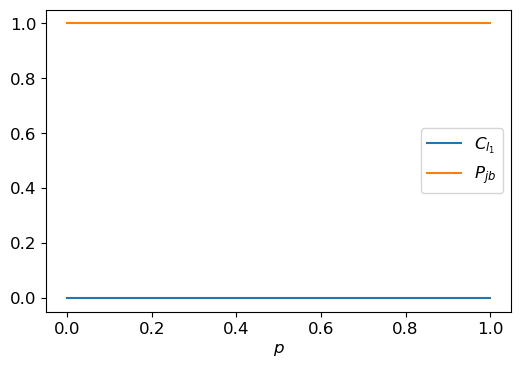

In [13]:
# calculo feito a partir da purificacao rhoAB_til
import matplotlib
matplotlib.rcParams.update({'font.size':12})
plt.figure(figsize = (6,4), dpi = 100)
plt.plot(p,Cl1,label=r'$C_{l_1}$')
plt.plot(p,Pjb,label=r'$P_{jb}$')
plt.xlabel(r'$p$')
plt.legend()
plt.show()

#### 2ª forma

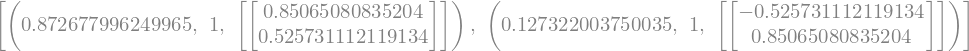

In [14]:
rho_A = Matrix([[2/3,1/3],[1/3,1/3]])
rho_A.eigenvects()

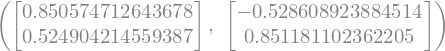

In [138]:
rho_A*Matrix([[0.85],[0.52]])/0.87, rho_A*Matrix([[-0.5257],[0.85]])/0.127

In [152]:
w, v = linalg.eig(rhoA) # os autovetores são as colunas de v
print(w, v, v.T[0], v.T[1], np.shape(v.T[1])) # nao pode usar 

[0.872678 0.127322] [[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]] [0.85065081 0.52573111] [-0.52573111  0.85065081] (2,)


In [12]:
import qiskit
from qiskit import *
nshots = 8192
IBMQ.load_account()
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
device = provider.get_backend('ibmq_quito')
simulator = Aer.get_backend('qasm_simulator')
from qiskit.tools.monitor import job_monitor
from qiskit_experiments.library import StateTomography

ibmqfactory.load_account:WARNING:2022-12-18 19:02:58,874: Credentials are already in use. The existing account in the session will be replaced.


#### 3ª forma

Para o canal depolarizing, temos que obter o estado
\begin{align}
& |\Phi\rangle_{ABC} = \sum_{j,l} \sqrt{r_l}K_j|r_l\rangle\otimes|l\rangle_B \otimes |j\rangle_C \\
= & \sqrt{r_0}K_0|r_0\rangle\otimes|0\rangle_B \otimes|0\rangle_C + \sqrt{r_0}K_1|r_0\rangle\otimes|0\rangle_B \otimes|1\rangle_C \\
& + \sqrt{r_0}K_2|r_0\rangle\otimes|0\rangle_B \otimes|2\rangle_C + \sqrt{r_0}K_3|r_0\rangle\otimes|0\rangle_B \otimes|3\rangle_C \\
& + \sqrt{r_1}K_0|r_1\rangle\otimes|1\rangle_B \otimes|0\rangle_C + \sqrt{r_1}K_1|r_1\rangle\otimes|1\rangle_B \otimes|1\rangle_C \\
& + \sqrt{r_1}K_2|r_1\rangle\otimes|1\rangle_B \otimes|2\rangle_C + \sqrt{r_1}K_3|r_1\rangle\otimes|1\rangle_B \otimes|3\rangle_C \\
= & \sqrt{r_0 p_I}\mathbb{I}|r_0\rangle\otimes|0\rangle_B \otimes|0\rangle_C + \sqrt{r_0 p_X}X|r_0\rangle\otimes|0\rangle_B \otimes|1\rangle_C \\
& + \sqrt{r_0 p_Z}Z|r_0\rangle\otimes|0\rangle_B \otimes|2\rangle_C + \sqrt{r_0 p_Y}Y|r_0\rangle\otimes|0\rangle_B \otimes|3\rangle_C \\
& + \sqrt{r_1 p_I}\mathbb{I}|r_1\rangle\otimes|1\rangle_B \otimes|0\rangle_C + \sqrt{r_1 p_X}X|r_1\rangle\otimes|1\rangle_B \otimes|1\rangle_C \\
& + \sqrt{r_1 p_Z}Z|r_1\rangle\otimes|1\rangle_B \otimes|2\rangle_C + \sqrt{r_1 p_Y}Y|r_1\rangle\otimes|1\rangle_B \otimes|3\rangle_C \\
\end{align}

Para
\begin{align}
& r_x = Tr(\rho_A X) = r\sin\theta\cos\phi, \\
& r_y = Tr(\rho_A Y) = r\sin\theta\sin\phi, \\
& r_z = Tr(\rho_A Z) = r\cos\theta, \\
\end{align}
pode-se escrever
\begin{align}
\rho_A & = \frac{1}{2}\big(\mathbb{I} + r_x X + r_y Y + r_z Z\big) = \frac{1}{2}\begin{bmatrix} 1+r_z & r_x-ir_y \\ r_x+ir_y & 1-r_z  \end{bmatrix} \\
& = \frac{1}{2}\begin{bmatrix} 1+r\cos\theta & r\sin\theta e^{-i\phi} \\ r\sin\theta e^{i\phi} & 1-r\cos\theta  \end{bmatrix} = \begin{bmatrix} \rho_{0,0} & \rho_{0,1} \\ \rho_{1,0} & \rho_{1,1}  \end{bmatrix}
\end{align}
com
\begin{align}
& r = \sqrt{(\rho_{00}-\rho_{11})^2 + |2\rho_{01}|^2}, \\
& \theta = \arccos\frac{\rho_{00}-\rho_{11}}{r}, \\
& \phi = \arccos \frac{\Re(2\rho_{01})}{r\sin\theta}.
\end{align}

Os autovalores de $\rho_A$ são
$$r_j = \frac{1+(-1)^j r}{2}\ \text{para}\ j=0,1$$
e os autovetores correspondentes são
\begin{align}
& |r_0\rangle = \cos(\theta/2)|0\rangle + e^{i\phi}\sin(\theta/2)|1\rangle, \\
& |r_1\rangle = \sin(\theta/2)|0\rangle - e^{i\phi}\cos(\theta/2)|1\rangle.
\end{align}
Temos assim que
\begin{align}
& X|r_0\rangle = \cos(\theta/2)|1\rangle + e^{i\phi}\sin(\theta/2)|0\rangle, \\
& Z|r_0\rangle = \cos(\theta/2)|0\rangle - e^{i\phi}\sin(\theta/2)|1\rangle, \\
& Y|r_0\rangle = i\cos(\theta/2)|1\rangle - ie^{i\phi}\sin(\theta/2)|0\rangle, \\
& X|r_1\rangle = \sin(\theta/2)|1\rangle - e^{i\phi}\cos(\theta/2)|0\rangle, \\
& Z|r_1\rangle = \sin(\theta/2)|0\rangle + e^{i\phi}\cos(\theta/2)|1\rangle, \\
& Y|r_1\rangle = i\sin(\theta/2)|1\rangle + ie^{i\phi}\cos(\theta/2)|0\rangle.
\end{align}

\begin{align}
|\Phi\rangle_{ABC} & = \sqrt{r_0 p_I}(\cos(\theta/2)|0\rangle + e^{i\phi}\sin(\theta/2)|1\rangle)\otimes|0\rangle_B \otimes|0\rangle_C \\
& + \sqrt{r_0 p_X}(\cos(\theta/2)|1\rangle + e^{i\phi}\sin(\theta/2)|0\rangle)\otimes|0\rangle_B \otimes|1\rangle_C \\
& + \sqrt{r_0 p_Z}(\cos(\theta/2)|0\rangle - e^{i\phi}\sin(\theta/2)|1\rangle)\otimes|0\rangle_B \otimes|2\rangle_C \\
& + \sqrt{r_0 p_Y}(i\cos(\theta/2)|1\rangle - ie^{i\phi}\sin(\theta/2)|0\rangle)\otimes|0\rangle_B \otimes|3\rangle_C \\
& + \sqrt{r_1 p_I}(\sin(\theta/2)|0\rangle - e^{i\phi}\cos(\theta/2)|1\rangle)\otimes|1\rangle_B \otimes|0\rangle_C \\
& + \sqrt{r_1 p_X}(\sin(\theta/2)|1\rangle - e^{i\phi}\cos(\theta/2)|0\rangle)\otimes|1\rangle_B \otimes|1\rangle_C \\
& + \sqrt{r_1 p_Z}(\sin(\theta/2)|0\rangle + e^{i\phi}\cos(\theta/2)|1\rangle)\otimes|1\rangle_B \otimes|2\rangle_C \\
& + \sqrt{r_1 p_Y}(i\sin(\theta/2)|1\rangle + ie^{i\phi}\cos(\theta/2)|0\rangle)\otimes|1\rangle_B \otimes|3\rangle_C \\
\end{align}

\begin{align}
|\Phi\rangle_{ABC} & = \sqrt{r_0 p_I}\cos(\theta/2)|000\rangle + \sqrt{r_0 p_I}e^{i\phi}\sin(\theta/2)|100\rangle \\
& + \sqrt{r_0 p_X}\cos(\theta/2)|101\rangle + \sqrt{r_0 p_X}e^{i\phi}\sin(\theta/2)|001\rangle \\
& + \sqrt{r_0 p_Z}\cos(\theta/2)|002\rangle - \sqrt{r_0 p_Z}e^{i\phi}\sin(\theta/2)|102\rangle \\
& + i\sqrt{r_0 p_Y}\cos(\theta/2)|103\rangle - i\sqrt{r_0 p_Y}e^{i\phi}\sin(\theta/2)|003\rangle \\
& + \sqrt{r_1 p_I}\sin(\theta/2)|010\rangle - \sqrt{r_1 p_I}e^{i\phi}\cos(\theta/2)|110\rangle \\
& + \sqrt{r_1 p_X}\sin(\theta/2)|111\rangle - \sqrt{r_1 p_X}e^{i\phi}\cos(\theta/2)|011\rangle \\
& + \sqrt{r_1 p_Z}\sin(\theta/2)|012\rangle + \sqrt{r_1 p_Z}e^{i\phi}\cos(\theta/2)|112\rangle \\
& + i\sqrt{r_1 p_Y}\sin(\theta/2)|113\rangle + i\sqrt{r_1 p_Y}e^{i\phi}\cos(\theta/2)|013\rangle
\end{align}

Usando 2 qubits para codifica o sistema auxiliar C teremos
\begin{align}
|\Phi\rangle_{ABcd} & = \sqrt{r_0 p_I}\cos(\theta/2)|0000\rangle + \sqrt{r_0 p_X}e^{i\phi}\sin(\theta/2)|0001\rangle \\
& + \sqrt{r_0 p_Z}\cos(\theta/2)|0010\rangle - i\sqrt{r_0 p_Y}e^{i\phi}\sin(\theta/2)|0011\rangle \\
& + \sqrt{r_1 p_I}\sin(\theta/2)|0100\rangle - \sqrt{r_1 p_X}e^{i\phi}\cos(\theta/2)|0101\rangle \\
& + \sqrt{r_1 p_Z}\sin(\theta/2)|0110\rangle + i\sqrt{r_1 p_Y}e^{i\phi}\cos(\theta/2)|0111\rangle \\
& + \sqrt{r_0 p_I}e^{i\phi}\sin(\theta/2)|1000\rangle + \sqrt{r_0 p_X}\cos(\theta/2)|1001\rangle  \\
& - \sqrt{r_0 p_Z}e^{i\phi}\sin(\theta/2)|1010\rangle + i\sqrt{r_0 p_Y}\cos(\theta/2)|1011\rangle  \\
&  - \sqrt{r_1 p_I}e^{i\phi}\cos(\theta/2)|1100\rangle + \sqrt{r_1 p_X}\sin(\theta/2)|1101\rangle  \\
&  + \sqrt{r_1 p_Z}e^{i\phi}\cos(\theta/2)|1110\rangle + i\sqrt{r_1 p_Y}\sin(\theta/2)|1111\rangle
\end{align}
Dado $\rho_A$, ou seja, dados $r,\theta,\phi$, e dado o canal quântico, ou seja, dado $p$, este é o estado que temos que preparar.

In [6]:
r00 = 2/3; r01 = 1.33/3; r10 = 1.33/3; r11 = 1/3 # initial state
r = math.sqrt((r00-r11)**2 + abs(2*r01)**2) # raio de Bloch
th = math.acos((r00-r11)/r)
ph = math.acos(re(2*r01)/(r*sin(th))) # angulos de Bloch
r0 = (1+r)/2.; r1 = (1-r)/2. # autovetores
print(r, th, ph, r0, r1)

0.9472533393390012 1.2112019334816335 1.4901161193847656e-08 0.9736266696695006 0.026373330330499378


In [8]:
pt = np.arange(0,1.01,0.01) # for the theoretical results
Ct = (1-pt)*(2*1.33/3)
Pt = (1-pt)*(1/3)

In [9]:
p = np.arange(0,1.1,0.1)
d = len(p)
Csim = np.zeros(d); Psim = np.zeros(d)

for j in range(0,d):
    pI = (4-3*p[j])/4; pX = p[j]/4; pZ = p[j]/4; pY = p[j]/4 # depolarizing
    # sequencia: 0000 0001 0010 0011 0100 0101 0110 0111 1000 1001 1010 1011 1100 1101 1110 1111  
    #           = 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
    Phi_ABCD = [math.sqrt(r0*pI)*math.cos(th/2), 
                math.sqrt(r0*pX)*(math.cos(ph)+1j*math.sin(ph))*math.sin(th/2), 
                math.sqrt(r0*pZ)*math.cos(th/2), 
                -1j*math.sqrt(r0*pY)*(math.cos(ph)+1j*math.sin(ph))*math.sin(th/2), 
                math.sqrt(r1*pI)*math.sin(th/2), 
                -math.sqrt(r1*pX)*(math.cos(ph)+1j*math.sin(ph))*math.cos(th/2), 
                math.sqrt(r1*pZ)*math.sin(th/2), 
                1j*math.sqrt(r1*pY)*(math.cos(ph)+1j*math.sin(ph))*math.cos(th/2), 
                math.sqrt(r0*pI)*(math.cos(ph)+1j*math.sin(ph))*math.sin(th/2), 
                math.sqrt(r0*pX)*math.cos(th/2), 
                -math.sqrt(r0*pZ)*(math.cos(ph)+1j*math.sin(ph))*math.sin(th/2), 
                1j*math.sqrt(r0*pY)*math.cos(th/2), 
                -math.sqrt(r1*pI)*(math.cos(ph)+1j*math.sin(ph))*math.cos(th/2), 
                math.sqrt(r1*pX)*math.sin(th/2), 
                math.sqrt(r1*pZ)*(math.cos(ph)+1j*math.sin(ph))*math.cos(th/2), 
                1j*math.sqrt(r1*pY)*math.sin(th/2)]
    qr = QuantumRegister(4) 
    qc = QuantumCircuit(qr)
    qc.initialize(Phi_ABCD, [qr[3],qr[2],qr[1],qr[0]])
    job_sim = StateTomography(qc, measurement_qubits = [0])
    data = job_sim.run(simulator, shots=nshots).block_for_results()
    rho_sim = data.analysis_results(0).value
    rho = rho_sim.to_operator().data
    Csim[j] = coh_l1(rho)
    Psim[j] = predict_jb(rho)

In [13]:
p = np.arange(0,1.1,0.1); d = len(p)
Cexp = np.zeros(d); Pexp = np.zeros(d)

for j in range(0,d):
    pI = (4-3*p[j])/4; pX = p[j]/4; pZ = p[j]/4; pY = p[j]/4
    Phi_ABCD = [math.sqrt(r0*pI)*math.cos(th/2), 
                math.sqrt(r0*pX)*(math.cos(ph)+1j*math.sin(ph))*math.sin(th/2), 
                math.sqrt(r0*pZ)*math.cos(th/2), 
                -1j*math.sqrt(r0*pY)*(math.cos(ph)+1j*math.sin(ph))*math.sin(th/2), 
                math.sqrt(r1*pI)*math.sin(th/2), 
                -math.sqrt(r1*pX)*(math.cos(ph)+1j*math.sin(ph))*math.cos(th/2), 
                math.sqrt(r1*pZ)*math.sin(th/2), 
                1j*math.sqrt(r1*pY)*(math.cos(ph)+1j*math.sin(ph))*math.cos(th/2), 
                math.sqrt(r0*pI)*(math.cos(ph)+1j*math.sin(ph))*math.sin(th/2), 
                math.sqrt(r0*pX)*math.cos(th/2), 
                -math.sqrt(r0*pZ)*(math.cos(ph)+1j*math.sin(ph))*math.sin(th/2), 
                1j*math.sqrt(r0*pY)*math.cos(th/2), 
                -math.sqrt(r1*pI)*(math.cos(ph)+1j*math.sin(ph))*math.cos(th/2), 
                math.sqrt(r1*pX)*math.sin(th/2), 
                math.sqrt(r1*pZ)*(math.cos(ph)+1j*math.sin(ph))*math.cos(th/2), 
                1j*math.sqrt(r1*pY)*math.sin(th/2)]
    qr = QuantumRegister(4); qc = QuantumCircuit(qr)
    qc.initialize(Phi_ABCD, [qr[3],qr[2],qr[1],qr[0]])
    qcst = StateTomography(qc, measurement_qubits = [0])
    data = qcst.run(device)
    print(data.experiment_id)
    rho = data.block_for_results().analysis_results(0).value
    rhoM = rho.to_operator().data
    Cexp[j] = coh_l1(rhoM)
    Pexp[j] = predict_jb(rhoM)
    print(Cexp,Pexp)

3afa630d-cc0c-46ea-82f6-a1cd97fc9fb9
[0.41252061 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ] [0.323 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
0ed2a309-3406-4846-bb59-0c92e76bd03e
[0.41252061 0.43112208 0.         0.         0.         0.
 0.         0.         0.         0.         0.        ] [0.323 0.388 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
2dfad688-728d-4be3-8f0c-9d44972a1a59
[0.41252061 0.43112208 0.33057261 0.         0.         0.
 0.         0.         0.         0.         0.        ] [0.323 0.388 0.343 0.    0.    0.    0.    0.    0.    0.    0.   ]
4c71863c-fcc8-4a6e-92ea-bc1757d2b02f
[0.41252061 0.43112208 0.33057261 0.40486325 0.         0.
 0.         0.         0.         0.         0.        ] [0.323 0.388 0.343 0.125 0.    0.    0.    0.    0.    0.    0.   ]
0a4c0dfb-c1c8-47e2-ae99-442e8bd2d764
[0.41252061 0.43112208 0.33057261 0.40486325 0.29635874 0.
 0.         0.      

In [ ]:
import matplotlib
matplotlib.rcParams.update({'font.size':12})
plt.figure(figsize = (6,4), dpi = 100)
plt.plot(pt,Ct,label=r'$C_{l_1}^{the}$')
plt.plot(pt,Pt,label=r'$P_{jb}^{the}$')
plt.plot(p,Csim,'*',label=r'$C_{l_1}^{sim}$')
plt.plot(p,Psim,'o',label=r'$P_{jb}^{sim}$')
plt.plot(p,Cexp,'^',label=r'$C_{l_1}^{exp}$')
plt.plot(p,Pexp,'+',label=r'$P_{jb}^{exp}$')
plt.xlabel(r'$p$')
plt.legend()
plt.show()

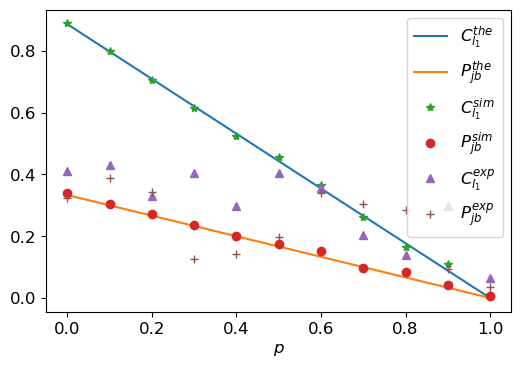

In [15]:
# para o chip quito, sem mitigacao de erro

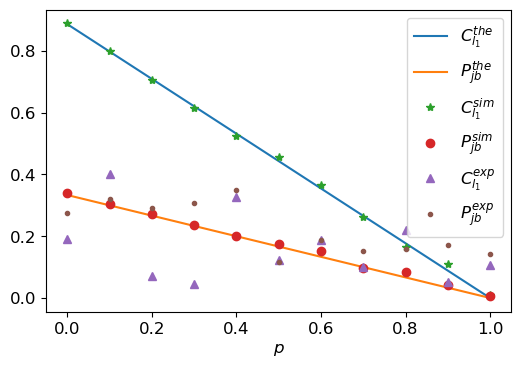

In [11]:
# para o chip manila sem mitigacao de erro